In [1]:
import numpy as np
import networkx as nx
from networkx.algorithms import floyd_warshall_numpy

In [9]:
cities = [
    "Inverness",
    "Aberdeen",
    "Leuchars",
    "StAndrews",
    "Edinburgh",
    "Glasgow",
    "York",
    "Cologne",
    "Carlisle",
    "Birmingham",
    "London",
    "Brussels",
    "Toronto",
    "Winnipeg",
    "Saskatoon",
    "Edmonton",
    "Jasper",
    "Vancouver"
  ];

connections = [
    ( "Inverness", "Aberdeen", 3, 2.5 ), # A, B, eta:A->B, eta:A<-B
    ( "Aberdeen", "Leuchars", 1.5, 1 ),
    ( "Leuchars", "Edinburgh", 1.5, 3 ),
    ( "Edinburgh", "Glasgow", 1, 1 ),
    ( "Edinburgh", "York", 3.5, 4 ),
    ( "Glasgow", "Carlisle", 1, 1 ),
    ( "Carlisle", "York", 2.5, 3.5 ),
    ( "Carlisle", "Birmingham", 2.0, 1 ),
    ( "Birmingham", "London", 1.5, 2.5 ),
    ( "Leuchars", "StAndrews", 0.2, 0.2 ),
    ( "York", "London", 1.8, 2.0 ),
    ( "London", "Brussels", 2.5, 3.5 ),
    ( "Brussels", "Cologne", 2, 1.5 ),
    ( "Toronto", "Winnipeg", 36, 35 ),
    ( "Winnipeg", "Saskatoon", 12, 5 ),
    ( "Saskatoon", "Edmonton", 12, 17 ),
    ( "Edmonton", "Jasper", 6, 5 ),
    ( "Jasper", "Vancouver", 12, 13 )
]


## Build graph

In [10]:
G = nx.DiGraph()
for city in cities:
    G.add_node(city) 

for connection in connections:
    a, b, ab, ba = connection

    G.add_weighted_edges_from([(a, b, ab)])
    G.add_weighted_edges_from([(b, a, ba)])


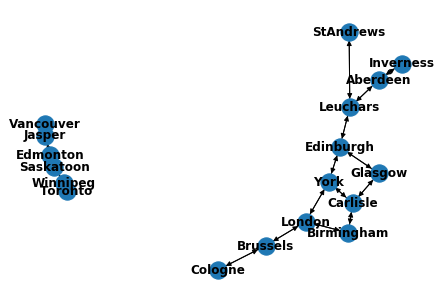

In [11]:
# Plot it
nx.draw(G, with_labels=True, font_weight='bold')


## Store graph
Create distance matrix and store graph

In [12]:
distance_matrix = floyd_warshall_numpy(G)
np.savetxt("data/distances.csv", distance_matrix, delimiter=",", header=",".join(G.nodes()))
print(distance_matrix[0,2]) # From Invernees to Leuchards

4.5


## Read graph

In [13]:
distance_matrix = np.genfromtxt("data/distances.csv", delimiter="," )
print(distance_matrix[0,2]) # From Invernees to Leuchards

4.5


In [14]:
distance_matrix

array([[ 0. ,  3. ,  4.5,  4.7,  6. ,  7. ,  9.5, 15.8,  8. , 10. , 11.3,
        13.8,  inf,  inf,  inf,  inf,  inf,  inf],
       [ 2.5,  0. ,  1.5,  1.7,  3. ,  4. ,  6.5, 12.8,  5. ,  7. ,  8.3,
        10.8,  inf,  inf,  inf,  inf,  inf,  inf],
       [ 3.5,  1. ,  0. ,  0.2,  1.5,  2.5,  5. , 11.3,  3.5,  5.5,  6.8,
         9.3,  inf,  inf,  inf,  inf,  inf,  inf],
       [ 3.7,  1.2,  0.2,  0. ,  1.7,  2.7,  5.2, 11.5,  3.7,  5.7,  7. ,
         9.5,  inf,  inf,  inf,  inf,  inf,  inf],
       [ 6.5,  4. ,  3. ,  3.2,  0. ,  1. ,  3.5,  9.8,  2. ,  4. ,  5.3,
         7.8,  inf,  inf,  inf,  inf,  inf,  inf],
       [ 7.5,  5. ,  4. ,  4.2,  1. ,  0. ,  3.5,  9. ,  1. ,  3. ,  4.5,
         7. ,  inf,  inf,  inf,  inf,  inf,  inf],
       [10.5,  8. ,  7. ,  7.2,  4. ,  4.5,  0. ,  6.3,  3.5,  4.3,  1.8,
         4.3,  inf,  inf,  inf,  inf,  inf,  inf],
       [17. , 14.5, 13.5, 13.7, 10.5,  9.5,  7. ,  0. ,  8.5,  7.5,  5. ,
         1.5,  inf,  inf,  inf,  inf,  inf,  inf],


# Single Source Shortest Path algorithm: Dijkstra Algorithm

Implement generic python code (i.e., the algorithms don't have to be
specified in SPARQL, but could be) for the Single Source Shortest Path
algorithm and return the shortest paths to all other cities starting from
London. You can choose either Dijkstra's or Bellman-Ford's algorithm

In [24]:
from collections import defaultdict

class Graph():
    def __init__(self):
        self.edges = defaultdict(list)
        self.weights = {}
    
    def add_edge(self, start_node, target_node, weight_1, weight_2 ):
        self.edges[start_node].append(target_node)
        self.edges[target_node].append(start_node)
        self.weights[(start_node, target_node)] = weight_1
        self.weights[(target_node, start_node)] = weight_2

In [30]:
def dijsktra_path(graph, start, end):
    shortest_paths = {start: (None, 0)}
    current_node = start
    visited = set()
    
    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)
        
        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "No Available Path"
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1]) #find the optimal next_destinations
    
    # prepare the shotest path
    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    # Reverse path
    path = path[::-1]
    return path

In [31]:
travel_graph = Graph()

for connection in connections:
    a, b, ab, ba = connection
    travel_graph.add_edge(a, b, ab, ba)

In [39]:
for city in cities:
    #dijsktra_path(travel_graph,"London",city)
    print("Find shortest path to",city,": ",dijsktra_path(travel_graph,"London",city))
    
    

Find shortest path to Inverness :  ['London', 'Birmingham', 'Carlisle', 'Glasgow', 'Edinburgh', 'Leuchars', 'Aberdeen', 'Inverness']
Find shortest path to Aberdeen :  ['London', 'Birmingham', 'Carlisle', 'Glasgow', 'Edinburgh', 'Leuchars', 'Aberdeen']
Find shortest path to Leuchars :  ['London', 'Birmingham', 'Carlisle', 'Glasgow', 'Edinburgh', 'Leuchars']
Find shortest path to StAndrews :  ['London', 'Birmingham', 'Carlisle', 'Glasgow', 'Edinburgh', 'Leuchars', 'StAndrews']
Find shortest path to Edinburgh :  ['London', 'Birmingham', 'Carlisle', 'Glasgow', 'Edinburgh']
Find shortest path to Glasgow :  ['London', 'Birmingham', 'Carlisle', 'Glasgow']
Find shortest path to York :  ['London', 'York']
Find shortest path to Cologne :  ['London', 'Brussels', 'Cologne']
Find shortest path to Carlisle :  ['London', 'Birmingham', 'Carlisle']
Find shortest path to Birmingham :  ['London', 'Birmingham']
Find shortest path to London :  ['London']
Find shortest path to Brussels :  ['London', 'Brusse

In [40]:
# travel_graph = Graph()
# [rows, cols] = distance_matrix.shape
# print(rows, cols)

# for i in range(rows):
#     for j in range(cols):
#         travel_graph.add_edge(cities[i],cities[j], distance_matrix[i,j])
#         print(cities[i],"->",cities[j],": ", distance_matrix[i,j])